In [1]:

from samplers import metropolis_sampler
from models import uniform_2d, log_p2, log_uniform
from utils import gelman_rubin, make_trace_plot, make_joint_plot
from scipy.stats import loguniform

import numpy as np
import argparse
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time
import matplotlib.pyplot as plt
import random
from corner import corner
from icecream import ic

In [2]:
# Load the data.
with open('../lighthouse_flash_data.txt','r') as f:
    data = []
    lines = f.readlines()
    for line in lines:
        fmt_line = line.rstrip().split(' ')
        x = float(fmt_line[0])
        I = float(fmt_line[1])
        data.append([x, I])

print(data[0])

[5.450773594606204, 0.10139300808742342]


ic| x0: array([0, 0, 1])


[INFO] Running chain 0


/Users/vishaljain/s2_cw/src/models.py:170: RuntimeWarning: divide by zero encountered in log
  log_likelihood_x = sum([np.log(cauchy(x, alpha, beta)) for x, _ in data])
/Users/vishaljain/s2_cw/src/models.py:170: RuntimeWarning: invalid value encountered in log
  log_likelihood_x = sum([np.log(cauchy(x, alpha, beta)) for x, _ in data])
/Users/vishaljain/s2_cw/src/models.py:134: RuntimeWarning: invalid value encountered in log
  mu = np.log(I0 / d**2)
/Users/vishaljain/s2_cw/src/models.py:175: RuntimeWarning: divide by zero encountered in log
  return log_likelihood + np.log(prior_1((alpha, beta))) + np.log(prior_2(I0))


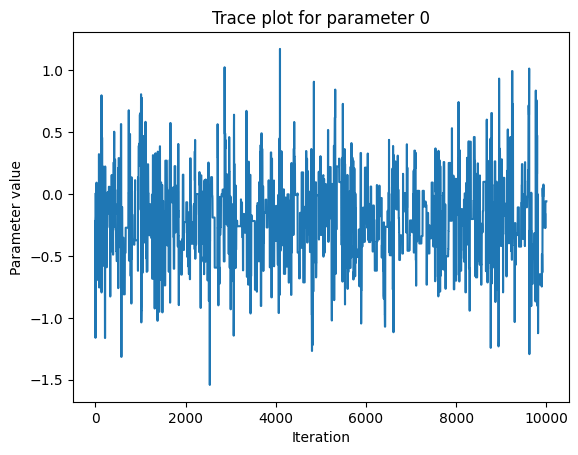

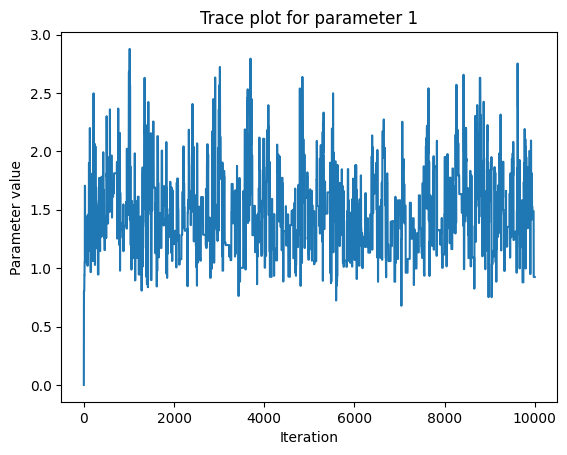

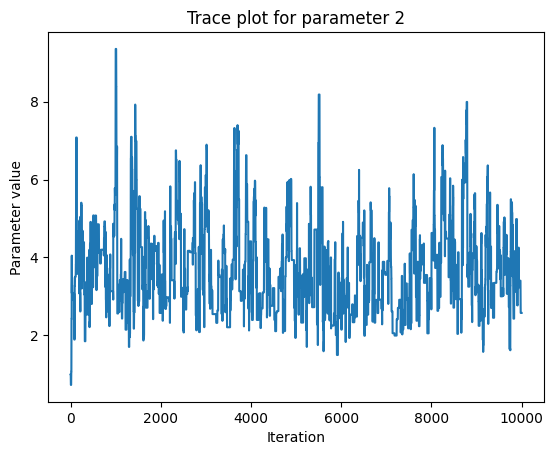

In [3]:
# Sampler hyper params.
n_chains = 1
n_samples = 10000

# Initialise the chains.
all_chains = np.zeros((n_chains, n_samples, 3))
all_iid_samples = []

# Prior limits for alpha.
a, b = -100, 100
# Prior limits for beta.
c, d = 0, 50
# Prior limits for I0.
e, f = 1e-4, 1e2

# Proposal covariance matrix.
cov_Q = np.asarray([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Define pdf lambda functions.
prior_1 = lambda theta: uniform_2d(theta, a, b, c, d)
prior_2 = lambda theta: log_uniform(theta, e, f)
log_posterior_2 = lambda theta: log_p2(theta, data, prior_1, prior_2)


for i in range(n_chains):
    print('[INFO] Running chain', i)
    # Draw x0 from the prior.
    alpha = np.random.uniform(a, b)
    beta = np.random.uniform(c, d)
    I0 = loguniform.rvs(e, f)
    x0 = np.asarray([0, 0 , 1])
    ic(x0)
    
    # Sample the posterior.
    samples, acceptance = metropolis_sampler(log_posterior_2, x0, n_samples, cov_Q)
    all_chains[i] = samples
    # plot trace for each parameter in the chain
    for j in range(3):
        plt.plot(samples[:, j])
        plt.xlabel('Iteration')
        plt.ylabel('Parameter value')
        plt.title('Trace plot for parameter {}'.format(j))
        plt.show()
    
    # Discard the burn-in.
    # samples = samples[int(0.1*n_samples):]
    # tau = max(integrated_time(samples[:, 0]), integrated_time(samples[:, 1]), integrated_time(samples[:, 2]))
    # thinning = int(2*tau)
    # iid_samples = samples[::thinning]
    # print('[INFO] Integrated autocorrelation time:', tau)
    # print('[INFO] Number of samples:', len(iid_samples))
    # all_iid_samples.extend(iid_samples)

In [4]:
np.log(0)

/var/folders/dv/2dpvhcy95qq29g3502cyk9cc0000gn/T/ipykernel_8223/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf